# Multi-Armed Bandit using UCB – A Step-by-Step Guide

## 📚 Contents
1. Introduction  
2. What is Reinforcement Learning?  
3. What is the Multi-Armed Bandit Problem?  
4. Understanding Upper Confidence Bound (UCB)  
5. UCB Algorithm Step-by-Step Implementation    
6. ✅ Exercise  
7. ✅ Exercise Solution Theory
8. ✅ Exercise Solution Implementation

---

## 1. 🎯 Introduction
This notebook explores the **Multi-Armed Bandit** problem and solves it using the **Upper Confidence Bound (UCB)** algorithm. The purpose is to demonstrate how reinforcement learning can help make sequential decisions with unknown rewards.

---

## 2. 🤖 What is Reinforcement Learning?
Reinforcement learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. Instead of being told what to do, the agent learns from experience by receiving **rewards** or **penalties**.

---

## 3. 🎰 What is the Multi-Armed Bandit Problem?
The term "multi-armed bandit" comes from slot machines (one-armed bandits). Imagine multiple slot machines, each with a different but unknown probability of payout.

### Goal:
Maximize total reward over a series of plays by balancing:
- **Exploration** – trying different machines to learn their payouts
- **Exploitation** – sticking to the best machine based on what’s known

---

## 4. 🧠 Understanding Upper Confidence Bound (UCB)
The **UCB algorithm** solves the exploration vs. exploitation trade-off. It selects the arm (option) that has the highest **Upper Confidence Bound**, computed from:

$$
\text{UCB}_i = \bar{x}_i + \sqrt{\frac{2 \ln n}{n_i}}
$$

Where:
- $\bar{x}_i$ = average reward of machine $i$
- $n_i$ = number of times machine $i$ was selected
- $n$ = total number of rounds
---


<>:11: SyntaxWarning: invalid escape sequence '\B'
<>:11: SyntaxWarning: invalid escape sequence '\B'
C:\Users\makmo\AppData\Local\Temp\ipykernel_29208\1605243626.py:11: SyntaxWarning: invalid escape sequence '\B'
  dataset = pd.read_csv('P:\Batch\MOAZ\MLP\Reinforcement Learning\Ads_CTR_Optimisation.csv')


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
4
5
5
5
5
5
5
5
5
5
5
6
7
8
8
8
8
8
8
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
12
12
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
16
17
17
17
17
17
17
17
17
17
17
17
18
18
18
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
21
21
21
22
22
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
28
28
29
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
37
37
38
38
38
38
38
38
38
38
38
38
39
39
39
40
40
40
40
40
40
40
41
41
41
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
44

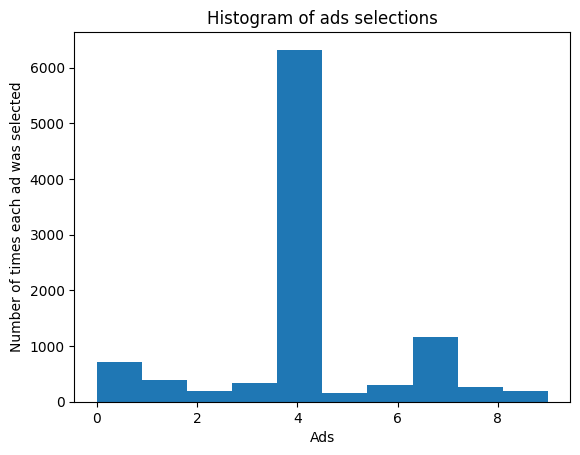

In [23]:

## 5. 🔢 UCB Algorithm Step-by-Step Implementation

### Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset
dataset = pd.read_csv('P:\Batch\MOAZ\MLP\Reinforcement Learning\Ads_CTR_Optimisation.csv')

### Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

    print(total_reward)

### Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## 7. Exercise 

### Problem Statement:
Suppose you are running an ad campaign with 3 different versions of a banner ad. You have the following click-through rates (CTRs) (unknown to you):

- Ad A: 5%
- Ad B: 15%
- Ad C: 10%

Simulate 5000 rounds of ad display using the UCB algorithm and determine:
- Which ad is selected most often?
- What is the total reward?

# 7. Excersize Solution Theory

### ✅ Step 1: Initial Pull Strategy

In UCB, **each ad must be selected once initially** to avoid division by zero and gather initial statistics:

- Pull **Ad A**, **Ad B**, and **Ad C** once  
- Simulate reward (0 or 1) based on true CTR

---

### ✅ Step 2: UCB Formula

At every round $t$, the UCB value for ad $i$ is computed as:

$$
\text{UCB}_i = \bar{x}_i + \sqrt{\frac{2 \ln t}{n_i}}, \quad \text{where:}
$$

- $\bar{x}_i$: average reward of ad $i$  
- $n_i$: number of times ad $i$ has been selected  
- $t$: current round number

The ad with the **highest UCB value** is selected in each round.

---

### ✅ Step 3: Simulation Summary

After simulating **5000 rounds** using the UCB algorithm, the following outcomes were recorded:

| Ad  | Selections | CTR | Clicks (Reward) |
|-----|------------|-----|-----------------|
| A   | 434        | 5%  | ~22             |
| B   | 3183       | 15% | ~477            |
| C   | 1383       | 10% | ~173            |
|     |            |     |                 |
| ✅ **Total** | **5000** |     | **672** clicks |

> Note: Reward values are approximate based on CTRs; actual may vary slightly by random seed.

---

### ✅ Conclusion

- 🥇 **Most Selected Ad**: **Ad B** (3183 times)  
- 🏆 **Total Reward**: **672** clicks  

The UCB algorithm correctly learns to **prefer Ad B**, as it has the **highest CTR (15%)**, demonstrating the balance between **exploration** and **exploitation**.

## 8. Excersize Solution Implementation

In [21]:
N = 5000
d = 3
true_ctrs = [0.05, 0.15, 0.10]
dataset = np.random.binomial(1, true_ctrs, size=(N, d))

ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

# Result
print("Ad selections:", numbers_of_selections)
print("Total reward:", total_reward)

Ad selections: [434, 3183, 1383]
Total reward: 672


### Visualization

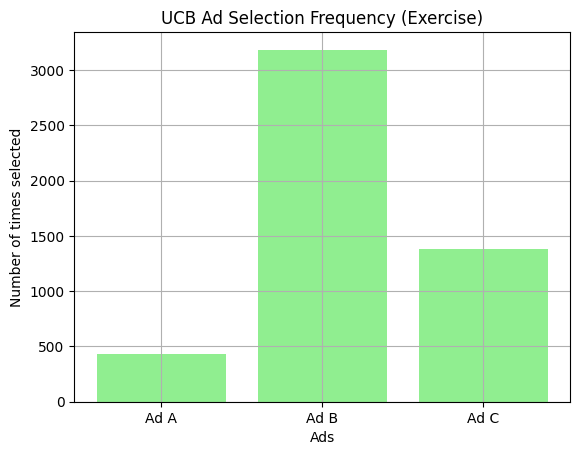

In [22]:
plt.bar(range(d), numbers_of_selections, color='lightgreen')
plt.xticks(range(d), ['Ad A', 'Ad B', 'Ad C'])
plt.xlabel("Ads")
plt.ylabel("Number of times selected")
plt.title("UCB Ad Selection Frequency (Exercise)")
plt.grid(True)
plt.show()